# Data Exploring

In [1]:
import os
import glob

root = '/mnt/project/'
proj_root = '/mnt/project/yihwang/regionBAE/'
brain_root = os.path.join(root, 'Bulk/Brain MRI/T1')

print(proj_root, brain_root)

/mnt/project/yihwang/regionBAE/ /mnt/project/Bulk/Brain MRI/T1


In [2]:
files = list()

for i in range(10, 60):
    files.extend(glob.glob(f'{brain_root}/{i}/*'))

print(len(files))
print(files[0])
print(files[-1])

0


IndexError: list index out of range

### 20263 MRI image visualizing

In [3]:
!pip install nibabel ipywidgets numpy matplotlib opencv-python SimpleITK ants antspynet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 102.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 289.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 MB 259.2 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.2/202.2 kB 313.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 248.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 265.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.8/18.8 MB 302.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 238.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 254.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 265.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.5/253.5 kB 321.7 MB/s eta 0:00:00
     ━━━━━━━━━━

In [4]:
%matplotlib inline
import nibabel as nib
import zipfile
import tempfile
import sys
import ants
src_dir = os.path.join(proj_root, 'src')
sys.path.append(os.path.abspath(src_dir))
from helpers import *

test_20263_zip = '/mnt/project/Bulk/Brain MRI/T1//59/5999855_20263_2_0.zip'

# MRI data
mgz_files = [
    'FreeSurfer/mri/orig.mgz',
    'FreeSurfer/mri/brain.mgz',
    'FreeSurfer/mri/brainmask.mgz',
    'FreeSurfer/mri/FLAIR.mgz',
    'FreeSurfer/mri/norm.mgz',
    'FreeSurfer/mri/T1.mgz',
    'FreeSurfer/mri/wm.mgz',
    'FreeSurfer/mri/aseg.mgz'
]

with zipfile.ZipFile(test_20263_zip, 'r') as z:
    
    # # print out the file list
    # z.printdir()
    with tempfile.TemporaryDirectory() as tmpdirname:
        for mgz_file in mgz_files:
            print(f"Current File Name: {mgz_file}")
            # zip 파일에서 임시 디렉토리로 추출
            z.extract(mgz_file, tmpdirname)
            extracted_file_path = os.path.join(tmpdirname, mgz_file)
            orig = nib.load(extracted_file_path)
            data = orig.get_fdata()
            explore_3D_array(data)

Current File Name: FreeSurfer/mri/orig.mgz


interactive(children=(IntSlider(value=127, description='SLICE', max=255), Output()), _dom_classes=('widget-int…

Current File Name: FreeSurfer/mri/brain.mgz


interactive(children=(IntSlider(value=127, description='SLICE', max=255), Output()), _dom_classes=('widget-int…

Current File Name: FreeSurfer/mri/brainmask.mgz


interactive(children=(IntSlider(value=127, description='SLICE', max=255), Output()), _dom_classes=('widget-int…

Current File Name: FreeSurfer/mri/FLAIR.mgz


interactive(children=(IntSlider(value=127, description='SLICE', max=255), Output()), _dom_classes=('widget-int…

Current File Name: FreeSurfer/mri/norm.mgz


interactive(children=(IntSlider(value=127, description='SLICE', max=255), Output()), _dom_classes=('widget-int…

Current File Name: FreeSurfer/mri/T1.mgz


interactive(children=(IntSlider(value=127, description='SLICE', max=255), Output()), _dom_classes=('widget-int…

Current File Name: FreeSurfer/mri/wm.mgz


interactive(children=(IntSlider(value=127, description='SLICE', max=255), Output()), _dom_classes=('widget-int…

Current File Name: FreeSurfer/mri/aseg.mgz


interactive(children=(IntSlider(value=127, description='SLICE', max=255), Output()), _dom_classes=('widget-int…

# Phecode

In [5]:
codes = set()
files_20252 = []
files_20263 = []
ids_20252 = set()
ids_20263 = set()

for file in files:
    file_split = file.split('_')
    id = file_split[0].split('/')[-1]
    id = int(id)
    code = file_split[1]
    codes.add(code)
    
    if code == '20252':
        if id not in ids_20252:
            files_20252.append(file)
        ids_20252.add(id)  # 20252에 해당하는 id 저장
    elif code == '20263':
        if id not in ids_20263:
            files_20263.append(file)
        ids_20263.add(id)  # 20263에 해당하는 id 저장

# 20252와 20263에 모두 포함된 id의 교집합
common_ids = ids_20252 & ids_20263
union_ids = ids_20252.union(ids_20263)

print(f"Total number of samples with MRI data: {len(files)}")
print(f"Total number of 20252 data: {len(files_20252)}")
print(f"Total number of 20263 data: {len(files_20263)}")
print(f"Common sample id: {len(common_ids)}")
print(f"Union sample id: {len(union_ids)}")

Total number of samples with MRI data: 101744
Total number of 20252 data: 49045
Total number of 20263 data: 42914
Common sample id: 42914
Union sample id: 49045


In [6]:
!pip install pandas

In [7]:
import pandas as pd

phe_b = 'PheCode_ICD10_withCovar_221012.txt' # 1.6G
phe_root = os.path.join(root, 'WGS/Pheno', phe_b) 

chunk_size = 10000  # 한 번에 읽을 line 수
chunks = []
for chunk in pd.read_csv(phe_root, sep=' ', chunksize=chunk_size):
    chunks.append(chunk)

phecode = pd.concat(chunks, ignore_index=True)
phecode

,IID,Age,Sex,PC1,PC2,PC3,PC4,PC5,PC6,PC7,...,ICD.985,ICD.986,ICD.987,ICD.988,ICD.989,ICD.990,ICD.994,ICD.994.1,ICD.994.2,ICD.994.21
0,1000019,63,2,-12.7523,5.51758,-2.769560,3.417220,2.09052,-2.097240,-0.321115,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1000022,67,1,-12.7985,2.80708,-1.870160,1.240280,-3.75800,0.133636,1.562960,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1000054,41,1,-12.8547,3.35619,-2.418000,4.210020,4.90457,-0.801530,3.094760,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1000063,64,1,-10.7902,3.18258,-2.535710,0.683035,-7.01252,-0.084810,2.035330,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1000081,68,2,-11.4894,5.96906,-2.569760,0.156349,5.06083,-0.501748,2.296230,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392774,6025354,62,1,-12.1136,4.87266,1.324690,-1.551830,-7.05209,0.484511,0.062191,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
392775,6025363,66,1,-11.0191,3.72067,-2.857040,1.689220,-2.62772,-2.411480,2.118100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
392776,6025378,69,2,-14.6343,1.93702,0.805761,4.715240,11.20950,-1.859240,0.323477,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
392777,6025381,56,1,-12.7698,5.58476,-0.646014,-2.869960,-9.18898,-1.594630,2.329510,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
icd = 'icd10code_main.csv' # 
icd10_root = os.path.join(root, 'icd_codes/', icd) 

chunks = []
for chunk in pd.read_csv(icd10_root, chunksize=chunk_size):
    chunks.append(chunk)

icdcode = pd.concat(chunks, ignore_index=True)
icdcode

,eid,41202-0.0
0,4281577,D125|D509|D649|H250|H258|H264|K20|K449|K921|R1...
1,5638257,H028|I802|I803|K219|M674|M766|N320|N419|N459|R...
2,5697790,E831|M169|M2575|M8612
3,1282360,J459
4,2979111,K210|R194
...,...,...
502264,4740373,K029|K529|K573|K802|M8198|M858|S2200
502265,2372295,K011
502266,2101438,C504
502267,3513686,A090|D125|H258|H268|I251|J90|K210|K509|N318|N3...


In [9]:
brain_mri_phe = phecode.loc[phecode.IID.isin(union_ids)].reset_index(drop=True)
brain_mri_phe

,IID,Age,Sex,PC1,PC2,PC3,PC4,PC5,PC6,PC7,...,ICD.985,ICD.986,ICD.987,ICD.988,ICD.989,ICD.990,ICD.994,ICD.994.1,ICD.994.2,ICD.994.21
0,1000502,65,2,-9.65144,2.29646,-1.006980,0.307684,9.03433,-0.822166,0.419353,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1000638,66,1,-13.00390,5.86328,0.758533,0.347362,-6.54550,0.816681,3.628210,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1000674,57,2,-11.44430,5.09502,-3.751830,-0.604938,-7.69812,-1.530490,1.962040,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1000752,56,2,-11.18940,2.67622,-1.275440,1.001230,-6.33439,-1.021860,-1.572810,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1000861,66,1,-10.71110,5.08526,-2.083810,0.243859,-3.72771,-0.105706,-0.044576,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39968,5999377,48,2,-13.41630,6.28687,-2.441750,2.038210,-5.82292,-0.490175,-2.782730,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39969,5999441,61,2,-12.89570,3.51797,-1.007530,2.312130,9.61632,-1.106370,-0.953990,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39970,5999453,46,2,-12.95210,5.56288,-3.212500,2.434600,-5.31847,-2.872850,-1.391500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39971,5999678,46,2,-11.58440,3.72697,-0.054356,0.091434,-5.18382,-1.558750,0.571556,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
brain_mri_icd = icdcode.loc[icdcode.eid.isin(union_ids)].reset_index(drop=True)
brain_mri_icd

,eid,41202-0.0
0,4057323,D401|J181|J189
1,3737859,J181|K900|R194|Z411
2,1732735,I839|I842|M169|M1902|N812
3,3592662,C443|C97|D259|R31
4,5571684,NaN
...,...,...
49024,2055264,J342|K210|K295|R13|S0220
49025,3443371,K259|K528|K529|K922|L031|R194|Z099
49026,3562166,A415|C920|C940|D758|I219|I251|J330|J348|K290|T...
49027,4740373,K029|K529|K573|K802|M8198|M858|S2200


In [11]:
len(brain_mri_icd['eid'].unique())

49029

In [12]:
brain_mri_icd[brain_mri_icd['41202-0.0'].apply(lambda x: isinstance(x, str) and 'F00' in x)]

,eid,41202-0.0
19531,4286233,F009|G309|R296|S010|Z125
22804,3103125,F009|G309|K296|K590
31090,1644847,F009|G439|K30|R073|S099|S4200


In [13]:
brain_mri_icd['41202-0.0'].isna().sum()

6847

In [14]:
brain_mri_phe_id = brain_mri_phe.set_index('IID', inplace=False)
brain_mri_phe_id

,Age,Sex,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,...,ICD.985,ICD.986,ICD.987,ICD.988,ICD.989,ICD.990,ICD.994,ICD.994.1,ICD.994.2,ICD.994.21
IID,,,,,,,,,,,,,,,,,,,,,
1000502,65,2,-9.65144,2.29646,-1.006980,0.307684,9.03433,-0.822166,0.419353,4.054570,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000638,66,1,-13.00390,5.86328,0.758533,0.347362,-6.54550,0.816681,3.628210,-2.876160,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000674,57,2,-11.44430,5.09502,-3.751830,-0.604938,-7.69812,-1.530490,1.962040,1.601110,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000752,56,2,-11.18940,2.67622,-1.275440,1.001230,-6.33439,-1.021860,-1.572810,-1.407080,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000861,66,1,-10.71110,5.08526,-2.083810,0.243859,-3.72771,-0.105706,-0.044576,-0.438059,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5999377,48,2,-13.41630,6.28687,-2.441750,2.038210,-5.82292,-0.490175,-2.782730,-0.841910,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5999441,61,2,-12.89570,3.51797,-1.007530,2.312130,9.61632,-1.106370,-0.953990,1.722100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5999453,46,2,-12.95210,5.56288,-3.212500,2.434600,-5.31847,-2.872850,-1.391500,-3.784300,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
mri_disease = dict()

def code_filtering(data):
    unique_roots = []
    seen = set()
    
    for item in data:
        root = item.split('.') 
        value = ''.join(root[1])
        if value not in seen:  
            unique_roots.append(value)
            seen.add(value)
    
    return unique_roots

for eid in brain_mri_phe['IID']:
    age = brain_mri_phe[brain_mri_phe['IID']==eid]['Age'].iloc[0]
    sex = brain_mri_phe[brain_mri_phe['IID']==eid]['Sex'].iloc[0]
    sample = brain_mri_phe_id.loc[eid]
    disease_codes = sample[sample > 0].index.tolist()[13:]
    filtered_disease_codes = code_filtering(disease_codes)
    disease = 1
    if len(disease_codes) == 0:
        disease = 0
    mri_disease[eid] = [age, sex, disease, filtered_disease_codes, disease_codes]

# 딕셔너리를 DataFrame으로 변환
mri_disease_df = pd.DataFrame([
    {'id': key, 'age': value[0], 'sex': value[1], 'disease': value[2], 'filtered_phe_codes': value[3], 'phe_codes': value[4]}
    for key, value in mri_disease.items()
])
mri_disease_df

,id,age,sex,disease,filtered_phe_codes,phe_codes
0,1000502,65,2,0,[],[]
1,1000638,66,1,1,"[172, 195, 327, 364, 366, 367, 374, 379, 401, ...","[ICD.172.2, ICD.195, ICD.195.1, ICD.327.3, ICD..."
2,1000674,57,2,1,"[241, 244, 374, 574]","[ICD.241, ICD.241.1, ICD.244, ICD.244.1, ICD.3..."
3,1000752,56,2,0,[],[]
4,1000861,66,1,0,[],[]
...,...,...,...,...,...,...
39968,5999377,48,2,0,[],[]
39969,5999441,61,2,0,[],[]
39970,5999453,46,2,1,[785],[ICD.785]
39971,5999678,46,2,0,[],[]


In [16]:
mri_disease_df['disease'].value_counts()

1    20952
0    19021
Name: disease, dtype: int64

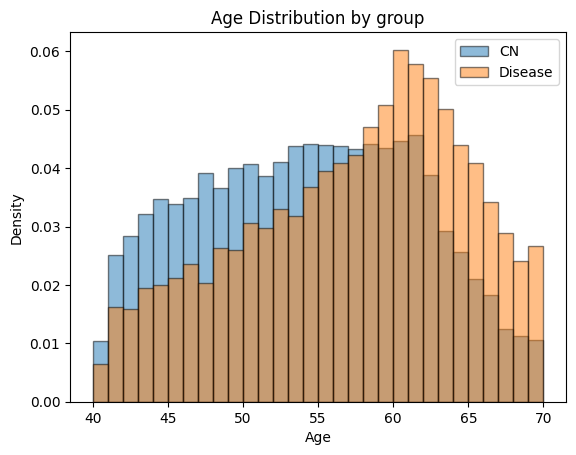

In [17]:
def age_dist_plot(cn=None, disease=None):
    if cn:
        plt.hist(cn, bins=30, alpha=0.5, label='CN', density=True, edgecolor='black')
    if disease:
        plt.hist(disease, bins=30, alpha=0.5, label='Disease', density=True, edgecolor='black')
    plt.title('Age Distribution by group')
    plt.xlabel('Age')
    plt.ylabel('Density')
    plt.legend(loc='upper right')
    plt.show()

cn_ages = mri_disease_df['age'][mri_disease_df['disease']==0].tolist()
disease_ages = mri_disease_df['age'][mri_disease_df['disease']==1].tolist()
age_dist_plot(cn_ages, disease_ages)

In [18]:
!pip install openpyxl

phe_esm_path = os.path.join(root, 'yihwang/phecode_esm.xlsx')
phe_esm = pd.read_excel(phe_esm_path, sheet_name=1)
phe_esm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 20.3 MB/s eta 0:00:00


,phecode,name,group,n,n_case,or,ci_lower,ci_upper,z,p
0,300,Anxiety disorders,mental disorders,109767,8886,1.639045,1.582127,1.698011,27.400720,2.688897e-165
1,564,Functional digestive disorders,digestive,105075,33242,1.227226,1.201627,1.253370,19.037959,8.268714e-81
2,401,Hypertension,circulatory system,117729,80060,1.145007,1.126818,1.163490,16.574087,1.072797e-61
3,785,Abdominal pain,symptoms,117885,40072,1.165437,1.143987,1.187290,16.152275,1.094502e-58
4,535,Gastritis and duodenitis,digestive,116707,30236,1.193614,1.167925,1.219868,15.943887,3.141885e-57
...,...,...,...,...,...,...,...,...,...,...
398,1006,Crushing injury,injuries & poisonings,117885,559,0.980929,0.795792,1.209137,-0.180434,8.568122e-01
399,262,Mineral deficiency NEC,endocrine/metabolic,117344,315,0.992251,0.782317,1.258520,-0.064142,9.488575e-01
400,1007,Injury to blood vessels,injuries & poisonings,117885,284,0.995050,0.775755,1.276335,-0.039070,9.688344e-01
401,246,Other disorders of thyroid,endocrine/metabolic,113062,413,0.997014,0.826413,1.202833,-0.031229,9.750866e-01


In [19]:
disease_group = phe_esm['group'].unique()
disease_group

array(['mental disorders', 'digestive', 'circulatory system', 'symptoms',
       'endocrine/metabolic', 'musculoskeletal', 'neurological',
       'neoplasms', 'genitourinary', 'injuries & poisonings',
       'respiratory', 'infectious diseases', 'hematopoietic',
       'sense organs', 'dermatologic', 'congenital anomalies'],
      dtype=object)

In [20]:
def id_filtering_group(group_name):
    group_phe = sorted(phe_esm['phecode'][phe_esm['group']==group_name].tolist())
    print(group_phe)

    disease_data = dict()
    for phecode in group_phe:
        disease_name = phe_esm['name'][phe_esm['phecode']==phecode].iloc[0]
        print(phecode, disease_name)
        filtered_id = id_filtering_single(phecode)
        disease_data[phecode] = len(filtered_id)

    id_disease_disorders = list()
    for key, value in mri_disease.items():
        for code in group_phe:
            if str(code) in value[3]:
                id_disease_disorders.append(key)
                break
    print(f"\nTotal number of {group_name}: {len(id_disease_disorders)}")

    group_plot(disease_data)
    
    return id_disease_disorders


def id_filtering_single(disease_code):
    id_disease = list()
    disease_name = phe_esm['name'][phe_esm['phecode']==disease_code].iloc[0]
    # print(disease_code, disease_name)
    
    for key, value in mri_disease.items():
        if str(disease_code) in value[3]:
            id_disease.append(key)
            
    # print(f"\nTotal number of {disease_name}: {len(id_disease)}")
    return id_disease

def group_plot(data):
    x = list(data.keys())
    y = list(data.values())
    
    # 플롯 그리기
    plt.figure(figsize=(20, 10))
    plt.xticks(range(min(x), max(x), 1), fontsize=8)
    plt.bar(x, y, color='skyblue')  # 막대 그래프를 사용
    plt.xlabel('Key')  # x축 레이블
    plt.ylabel('Count')  # y축 레이블
    plt.title('Count per Key')  # 그래프 제목
    plt.show()

[320, 323, 324, 327, 331, 332, 333, 334, 335, 337, 338, 339, 340, 341, 342, 344, 345, 348, 349, 350, 351, 352, 353, 357, 359]
320 Meningitis
323 Encephalitis
324 Other CNS infection and poliomyelitis
327 Sleep disorders
331 Other cerebral degenerations
332 Parkinson's disease
333 Extrapyramidal disease and abnormal movement disorders
334 Degenerative disease of the spinal cord
335 Multiple sclerosis
337 Disorders of the autonomic nervous system
338 Pain
339 Other headache syndromes
340 Migraine
341 Other demyelinating diseases of central nervous system
342 Hemiplegia
344 Other paralytic syndromes
345 Epilepsy, recurrent seizures, convulsions
348 Other conditions of brain
349 Other and unspecified disorders of the nervous system
350 Abnormal movement
351 Other peripheral nerve disorders
352 Disorders of other cranial nerves
353 Nerve root and plexus disorders
357 Inflammatory and toxic neuropathy
359 Muscular dystrophies and other myopathies

Total number of neurological: 1785


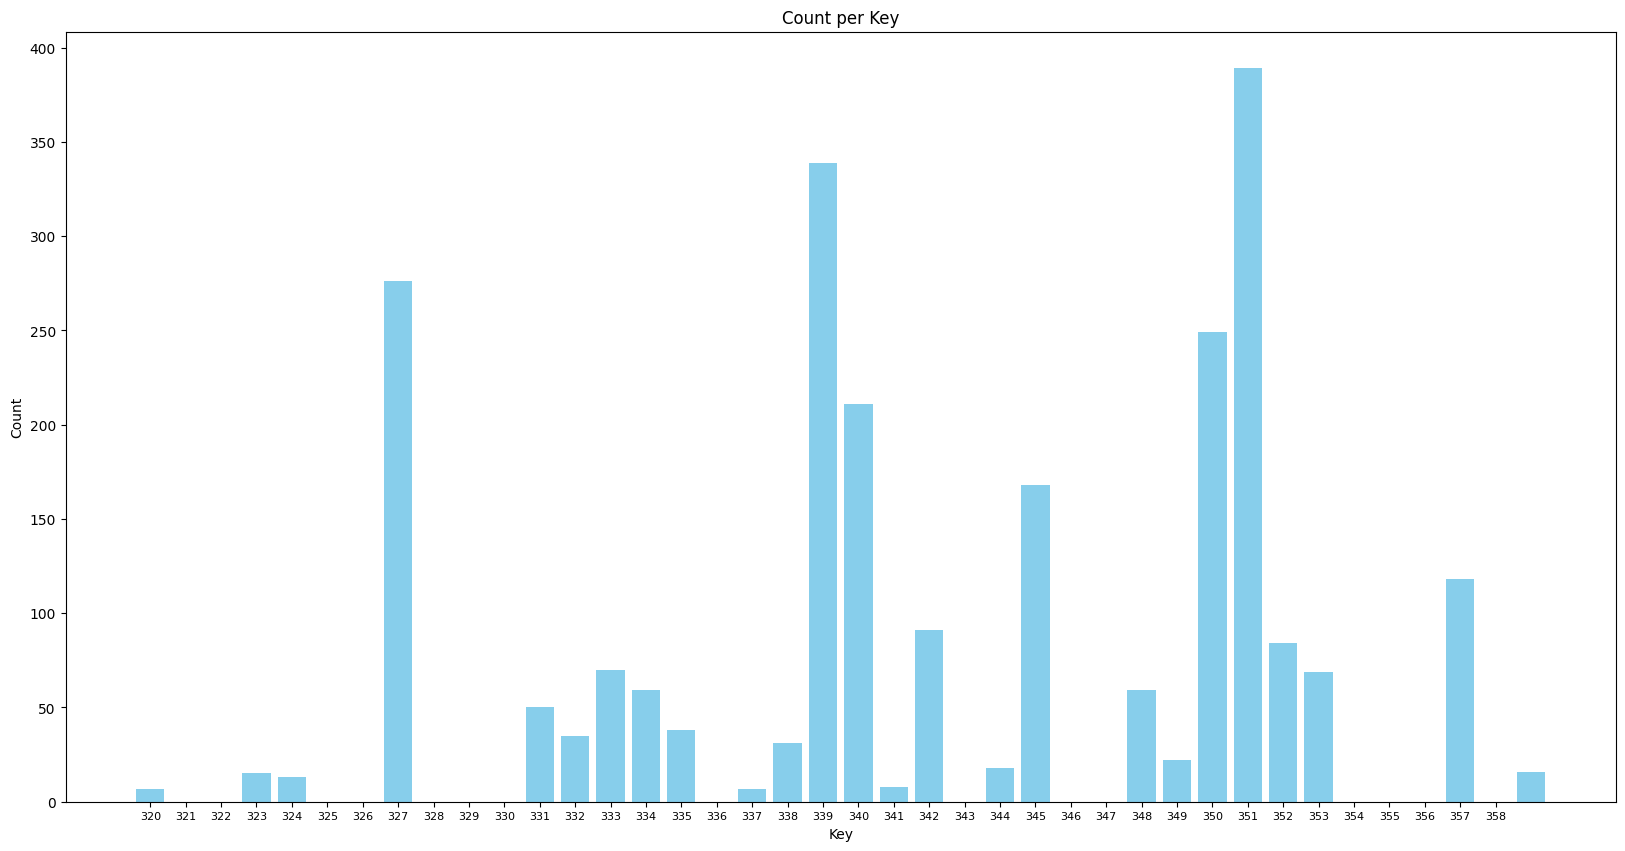

In [21]:
id_neurological_disorders = id_filtering_group(disease_group[6])

[290, 291, 292, 293, 295, 296, 297, 300, 301, 303, 304, 306, 315, 316, 317, 318]
290 Delirium dementia and amnestic and other cognitive disorders
291 Other specified nonpsychotic and/or transient mental disorders
292 Neurological disorders
293 Symptoms involving head and neck
295 Schizophrenia and other psychotic disorders
296 Mood disorders
297 Suicidal ideation or attempt
300 Anxiety disorders
301 Personality disorders
303 Psychogenic and somatoform disorders
304 Adjustment reaction
306 Other mental disorder
315 Develomental delays and disorders
316 Substance addiction and disorders
317 Alcohol-related disorders
318 Tobacco use disorder

Total number of mental disorders: 2806


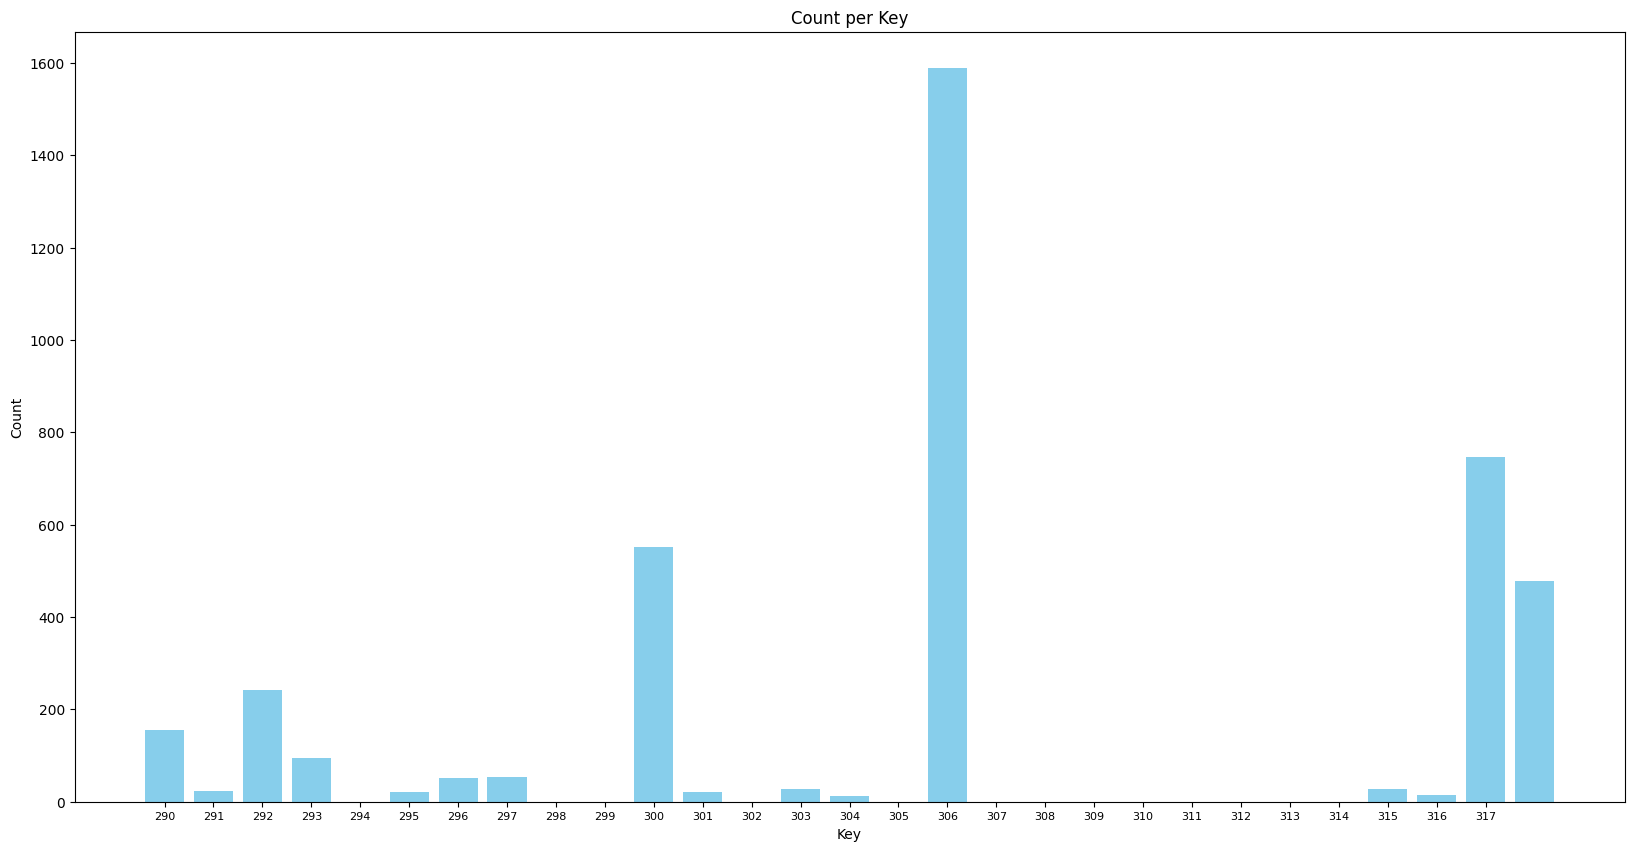

In [22]:
id_mental_disorders = id_filtering_group(disease_group[0])

[394, 395, 396, 401, 402, 411, 414, 415, 416, 418, 420, 425, 426, 427, 428, 429, 430, 433, 440, 441, 442, 443, 444, 446, 447, 448, 450, 451, 452, 454, 455, 458, 459]
394 Rheumatic disease of the heart valves
395 Heart valve disorders
396 Abnormal heart sounds
401 Hypertension
402 Elevated blood pressure reading without diagnosis of hypertension
411 Ischemic Heart Disease
414 Other forms of chronic heart disease
415 Pulmonary heart disease
416 Cardiomegaly
418 Nonspecific chest pain
420 Carditis
425 Cardiomyopathy
426 Cardiac conduction disorders
427 Cardiac dysrhythmias
428 Congestive heart failure; nonhypertensive
429 Ill-defined descriptions and complications of heart disease
430 Intracranial hemorrhage
433 Cerebrovascular disease
440 Atherosclerosis
441 Vascular insufficiency of intestine
442 Other aneurysm
443 Peripheral vascular disease
444 Arterial embolism and thrombosis
446 Polyarteritis nodosa and allied conditions
447 Other disorders of arteries and arterioles
448 Disease of 

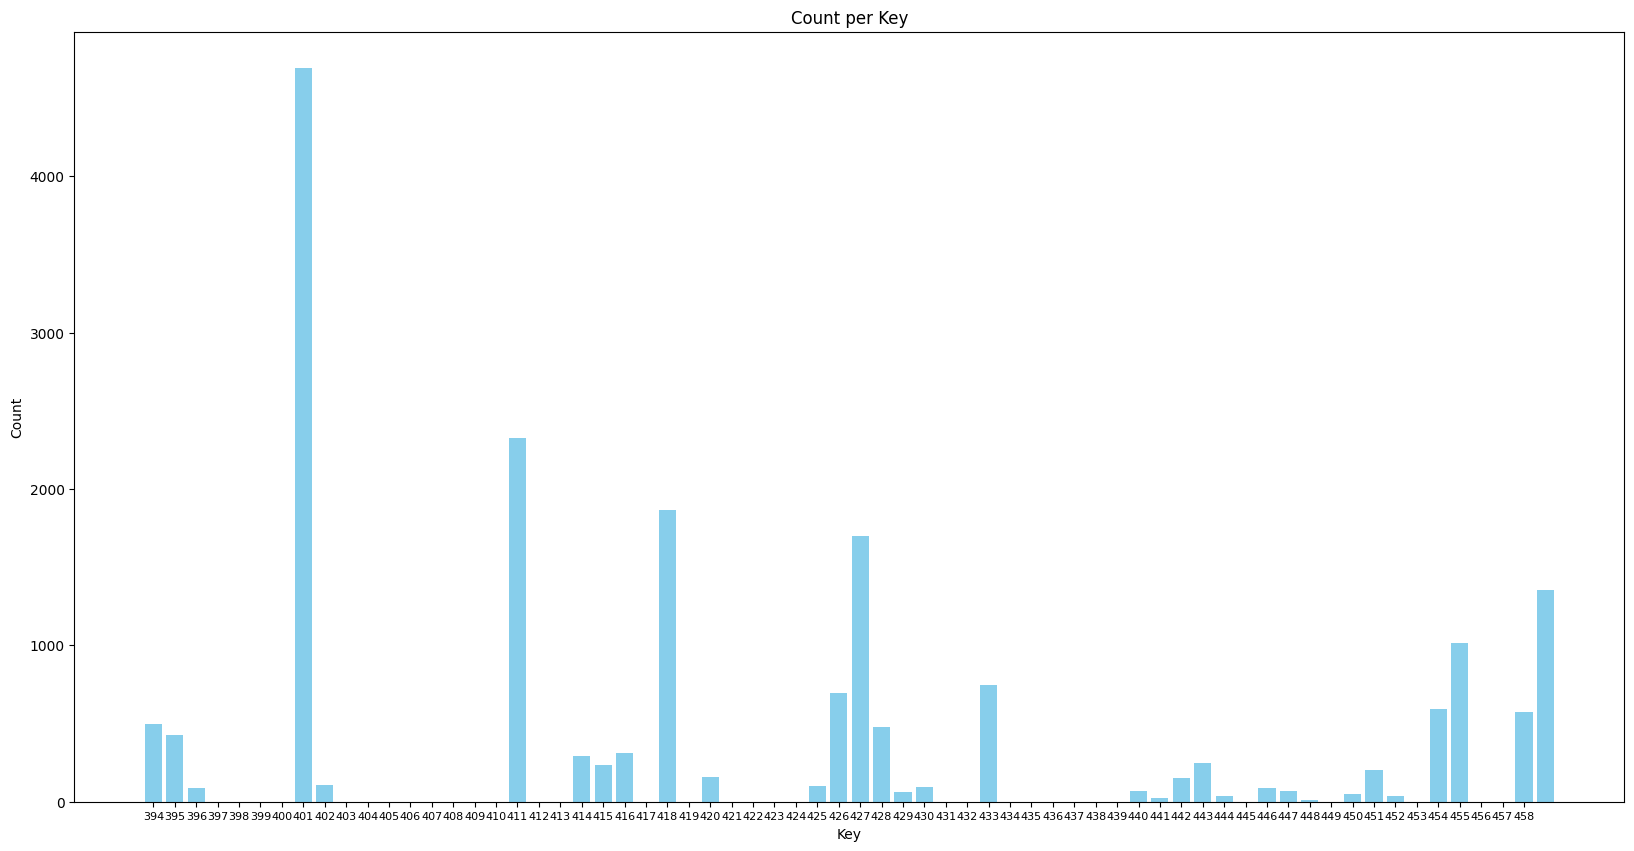

In [23]:
id_circulatory_disorders = id_filtering_group(disease_group[2])

[240, 241, 242, 244, 245, 246, 250, 251, 252, 253, 255, 260, 261, 262, 269, 270, 272, 274, 275, 276, 277, 278, 279]
240 Simple and unspecified goiter
241 Nontoxic nodular goiter
242 Thyrotoxicosis with or without goiter
244 Hypothyroidism
245 Thyroiditis
246 Other disorders of thyroid
250 Diabetes mellitus
251 Other disorders of pancreatic internal secretion
252 Disorders of parathyroid gland
253 Disorders of the pituitary gland and its hypothalamic control
255 Disorders of adrenal glands
260 Protein-calorie malnutrition
261 Vitamin deficiency
262 Mineral deficiency NEC
269 Proteinuria
270 Disorders of protein plasma/amino-acid transport and metabolism
272 Disorders of lipoid metabolism
274 Gout and other crystal arthropathies
275 Disorders of mineral metabolism
276 Disorders of fluid, electrolyte, and acid-base balance
277 Other disorders of metabolism
278 Overweight, obesity and other hyperalimentation
279 Disorders involving the immune mechanism

Total number of endocrine/metabolic:

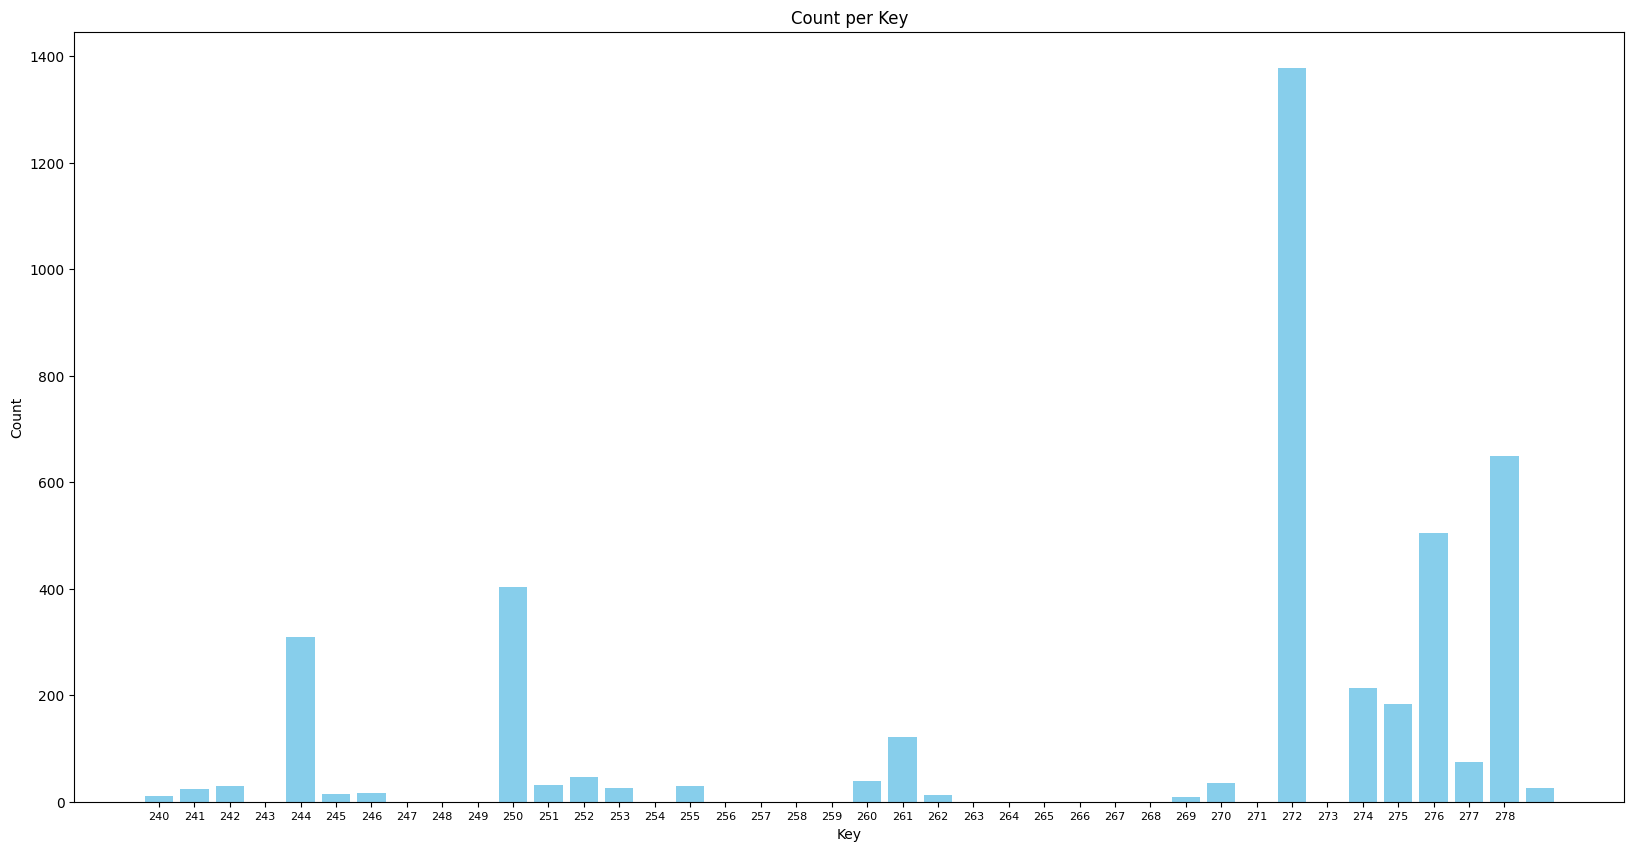

In [24]:
id_metabolic = id_filtering_group(disease_group[4])

404


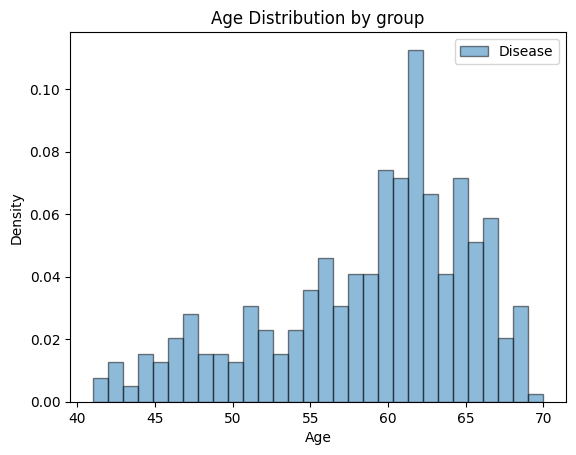

In [25]:
id_diabete = id_filtering_single(250)
print(len(id_diabete))
diabete_ages = mri_disease_df['age'][mri_disease_df.id.isin(id_diabete)].tolist()
age_dist_plot(None, diabete_ages)

[520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 535, 536, 537, 540, 550, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 567, 568, 569, 571, 572, 573, 574, 575, 577, 578, 579]
520 Disorders of tooth development
521 Diseases of hard tissues of teeth
522 Diseases of pulp and periapical tissues
523 Gingival and periodontal diseases
524 Dentofacial anomalies, including malocclusion
525 Other diseases of the teeth and supporting structures
526 Diseases of the jaws
527 Diseases of the salivary glands
528 Diseases of the oral soft tissues, excluding lesions specific for gingiva and tongue
529 Diseases and other conditions of the tongue
530 Diseases of esophagus
531 Peptic ulcer (excl. esophageal)
532 Dysphagia
535 Gastritis and duodenitis
536 Disorders of function of stomach
537 Other disorders of stomach and duodenum
540 Appendiceal conditions
550 Abdominal hernia
555 Inflammatory bowel disease and other gastroenteritis and colitis
556 Ulceration of the lower GI trac

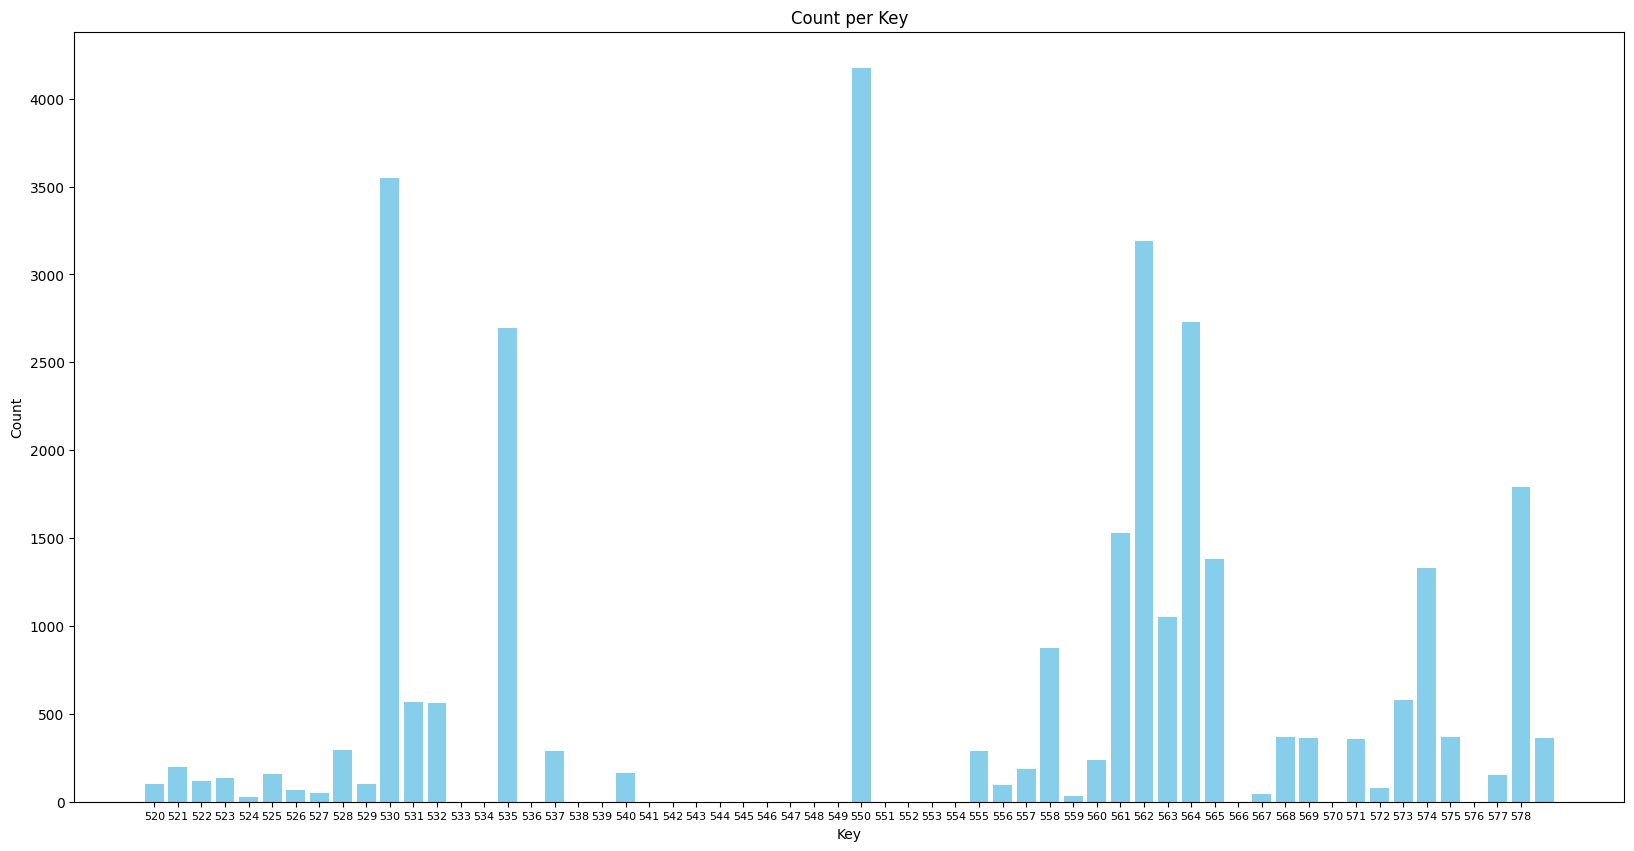

In [26]:
id_digestive = id_filtering_group(disease_group[1]) # 550: 탈장, 531: 식도 질환, 561: 소화기계 관련 증상, 564: 소화 기능 장애, 535: 위 & 십이지장 염증

# UKBB Alzheimer's Disease Region-Specific Brain Age Prediction

155


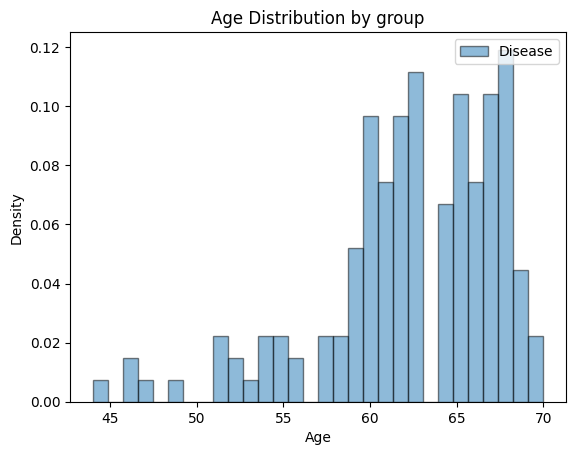

In [27]:
id_ad = id_filtering_single(290)
print(len(id_ad))
ad_ages = mri_disease_df['age'][mri_disease_df.id.isin(id_ad)].tolist()
age_dist_plot(None, ad_ages)

In [28]:
# def mk_csv(filtered_id, csv_name):
#     mri_disease = mri_disease_df[mri_disease_df['id'].isin(filtered_id)].reset_index(drop=True)
#     save_path = os.path.join(proj_root, 'data/ukbb_phe_' + csv_name + '.csv')
#     print(save_path)
#     mri_disease.to_csv(save_path)

# mk_csv(id_ad, 'ad')

### 1. Preprocessing

In [29]:
ads = []
id_ad_set = set(id_ad)
for file in files_20252:
    curr = file.split('_')[0].split('/')[-1]
    if int(curr) in id_ad_set:
        ads.append(file)

In [30]:
print(len(ads), ads[0])

155 /mnt/project/Bulk/Brain MRI/T1/10/1026876_20252_2_0.zip


In [31]:
# Valid File filtering
ad_root = list()
invalid_idx = list()
ad_t1_imgs = list()

for ad_zip in ads:
    # print(f"Current File Name: {ad_zip}")
    
    with zipfile.ZipFile(ad_zip, 'r') as z:

        with tempfile.TemporaryDirectory() as tmpdirname:
            t1_file = 'T1/T1_brain_to_MNI.nii.gz'
            # zip 파일에서 임시 디렉토리로 추출
            try:
                z.extract(t1_file, tmpdirname)
                # extracted_file_path = os.path.join(tmpdirname, t1_file)
                # orig = nib.load(extracted_file_path)
                # data = orig.get_fdata()
                # ad_t1_imgs.append(data)
                ad_root.append(ad_zip)
                # explore_3D_array(data)
            except Exception as e:
                tmp = ad_zip.split('/')[-1]
                curr_id = tmp.split('_')[0]
                print(f"======= Error ======= Unusable file: {curr_id, ad_zip}")
                invalid_idx.append(int(curr_id))

======= Error ======= Unusable file: ('1086141', '/mnt/project/Bulk/Brain MRI/T1/10/1086141_20252_2_0.zip')
======= Error ======= Unusable file: ('1241590', '/mnt/project/Bulk/Brain MRI/T1/12/1241590_20252_2_0.zip')
======= Error ======= Unusable file: ('1547560', '/mnt/project/Bulk/Brain MRI/T1/15/1547560_20252_2_0.zip')
======= Error ======= Unusable file: ('1559391', '/mnt/project/Bulk/Brain MRI/T1/15/1559391_20252_2_0.zip')
======= Error ======= Unusable file: ('1774116', '/mnt/project/Bulk/Brain MRI/T1/17/1774116_20252_2_0.zip')
======= Error ======= Unusable file: ('2137081', '/mnt/project/Bulk/Brain MRI/T1/21/2137081_20252_2_0.zip')
======= Error ======= Unusable file: ('2862835', '/mnt/project/Bulk/Brain MRI/T1/28/2862835_20252_2_0.zip')
======= Error ======= Unusable file: ('3018960', '/mnt/project/Bulk/Brain MRI/T1/30/3018960_20252_2_0.zip')
======= Error ======= Unusable file: ('3649232', '/mnt/project/Bulk/Brain MRI/T1/36/3649232_20252_2_0.zip')
======= Error ======= Unusab

In [32]:
print(len(invalid_idx), invalid_idx)

14 [1086141, 1241590, 1547560, 1559391, 1774116, 2137081, 2862835, 3018960, 3649232, 3833196, 4376859, 4679997, 4787374, 5973198]


In [33]:
ad_mri_df = mri_disease_df[mri_disease_df['id'].isin(id_ad)].reset_index(drop=True)
ad_mri_df = ad_mri_df[~ad_mri_df['id'].isin(invalid_idx)].reset_index(drop=True)
ad_mri_df

,id,age,sex,disease,filtered_phe_codes,phe_codes
0,1026876,60,2,1,"[290, 292, 401, 411, 425, 428, 530, 578, 591, ...","[ICD.290.2, ICD.292, ICD.292.4, ICD.401, ICD.4..."
1,1045578,68,2,1,"[174, 175, 197, 260, 275, 276, 278, 280, 286, ...","[ICD.174.1, ICD.174.11, ICD.175, ICD.197, ICD...."
2,1119410,56,1,1,"[272, 275, 276, 278, 290, 292, 300, 306, 318, ...","[ICD.272, ICD.272.1, ICD.272.11, ICD.275, ICD...."
3,1121869,61,1,1,"[290, 292, 339, 401, 411, 418, 458, 512]","[ICD.290.2, ICD.292, ICD.292.4, ICD.339, ICD.4..."
4,1151871,61,1,1,"[276, 290, 292, 394, 401, 411, 426, 427, 433, ...","[ICD.276.41, ICD.290, ICD.290.2, ICD.292, ICD...."
...,...,...,...,...,...,...
136,5725650,64,1,1,"[278, 290, 306, 401, 402, 427, 455, 470, 471, ...","[ICD.278.1, ICD.290, ICD.306, ICD.401, ICD.401..."
137,5763095,60,1,1,"[198, 274, 275, 290, 306, 317, 318, 333, 451, ...","[ICD.198.6, ICD.274, ICD.274.1, ICD.275, ICD.2..."
138,5872856,68,1,1,"[272, 274, 289, 290, 306, 345, 366, 401, 416, ...","[ICD.272.1, ICD.272.11, ICD.274, ICD.274.1, IC..."
139,5980396,68,1,1,"[290, 292, 316, 317, 318, 401, 418, 433, 459, ...","[ICD.290, ICD.290.1, ICD.290.16, ICD.292, ICD...."


In [34]:
# index로 file 경로와 dataframe matching 되는지 확인
for i in range(len(ad_root)):
    path = ad_root[i]
    curr = path.split('/')[-1]
    curr_id = curr.split('_')[0]
    if int(curr_id) != ad_mri_df.iloc[i]['id']:
        print(i, curr_id, ad_root[i])

In [35]:
def process_subject(atlas_template_path, regions, tmp_path, extracted_file_path, img_data, visualizing):
    image_ants = ants.image_read(extracted_file_path)
    image_ants = ants.resample_image(image_ants, (128, 128, 128), 1, 0)
    image = image_ants.numpy()
    
    # test
    if visualizing:
        explore_3D_array(image)
    # preprocessing
    else: 
        img_data['imgs'].append(image)
    
    template = ants.image_read(atlas_template_path)
    transformation = ants.registration(
        fixed=image_ants,
        moving=template, 
        type_of_transform='SyN',
        outprefix=tmp_path
    )
    registered_atlas_ants = transformation['warpedmovout']
    gc.collect()

    for region_idx in range(1, 10):
        i = region_idx - 1
        region_mask = registered_atlas_ants == region_idx
        region_mask_dilated = ants.morphology(region_mask, radius=15, operation='dilate', mtype='binary')
        
        # test
        if visualizing:
            print(regions[i])
            explore_3D_array_with_mask_contour(image, region_mask_dilated.numpy())
        # preprocessing
        else:
            extracted_region = image * region_mask_dilated.numpy()
            img_data[regions[i]].append(extracted_region)

            del extracted_region
        gc.collect()

In [36]:
from tqdm import tqdm
import gc

tmp_path = proj_root + f'data/ukbb_region/tmp'
regions = ['caudate', 'cerebellum', 'frontal_lobe', 'insula', 'occipital_lobe', 'parietal_lobe', 'putamen', 'temporal_lobe', 'thalamus']

In [37]:
atlas_template_path = os.path.join(proj_root, 'data/template/MNI-maxprob-thr0-1mm.nii.gz')

# test
ad_zip = ad_root[0]
with zipfile.ZipFile(ad_zip, 'r') as z:
    with tempfile.TemporaryDirectory() as tmpdirname:
        t1_file = 'T1/T1_brain_to_MNI.nii.gz'

        # zip 파일에서 임시 디렉토리로 추출
        z.extract(t1_file, tmpdirname)
        extracted_file_path = os.path.join(tmpdirname, t1_file)

        # preprocessing
        process_subject(atlas_template_path, regions, tmp_path, extracted_file_path, {}, True)
        gc.collect()

interactive(children=(IntSlider(value=63, description='SLICE', max=127), Output()), _dom_classes=('widget-inte…

caudate


interactive(children=(IntSlider(value=63, description='SLICE', max=127), Output()), _dom_classes=('widget-inte…

cerebellum


interactive(children=(IntSlider(value=63, description='SLICE', max=127), Output()), _dom_classes=('widget-inte…

frontal_lobe


interactive(children=(IntSlider(value=63, description='SLICE', max=127), Output()), _dom_classes=('widget-inte…

insula


interactive(children=(IntSlider(value=63, description='SLICE', max=127), Output()), _dom_classes=('widget-inte…

occipital_lobe


interactive(children=(IntSlider(value=63, description='SLICE', max=127), Output()), _dom_classes=('widget-inte…

parietal_lobe


interactive(children=(IntSlider(value=63, description='SLICE', max=127), Output()), _dom_classes=('widget-inte…

putamen


interactive(children=(IntSlider(value=63, description='SLICE', max=127), Output()), _dom_classes=('widget-inte…

temporal_lobe


interactive(children=(IntSlider(value=63, description='SLICE', max=127), Output()), _dom_classes=('widget-inte…

thalamus


interactive(children=(IntSlider(value=63, description='SLICE', max=127), Output()), _dom_classes=('widget-inte…

In [38]:
# preprocessing data dictionary
img_data = {
    'subjectID': [],
    'imgs': []
}
for region in regions:
    img_data[region] = []
    
for i in tqdm(range(len(ad_mri_df))):
    ad_zip = ad_root[i]
    img_data['subjectID'].append(ad_mri_df['id'][i])
    with zipfile.ZipFile(ad_zip, 'r') as z:
        with tempfile.TemporaryDirectory() as tmpdirname:
            t1_file = 'T1/T1_brain_to_MNI.nii.gz'
            
            # zip 파일에서 임시 디렉토리로 추출
            z.extract(t1_file, tmpdirname)
            extracted_file_path = os.path.join(tmpdirname, t1_file)
            
            # preprocessing
            process_subject(atlas_template_path, regions, tmp_path, extracted_file_path, img_data, False)
            gc.collect()

100%|██████████| 141/141 [34:49<00:00, 14.82s/it]


In [39]:
ad_mri_df

,id,age,sex,disease,filtered_phe_codes,phe_codes
0,1026876,60,2,1,"[290, 292, 401, 411, 425, 428, 530, 578, 591, ...","[ICD.290.2, ICD.292, ICD.292.4, ICD.401, ICD.4..."
1,1045578,68,2,1,"[174, 175, 197, 260, 275, 276, 278, 280, 286, ...","[ICD.174.1, ICD.174.11, ICD.175, ICD.197, ICD...."
2,1119410,56,1,1,"[272, 275, 276, 278, 290, 292, 300, 306, 318, ...","[ICD.272, ICD.272.1, ICD.272.11, ICD.275, ICD...."
3,1121869,61,1,1,"[290, 292, 339, 401, 411, 418, 458, 512]","[ICD.290.2, ICD.292, ICD.292.4, ICD.339, ICD.4..."
4,1151871,61,1,1,"[276, 290, 292, 394, 401, 411, 426, 427, 433, ...","[ICD.276.41, ICD.290, ICD.290.2, ICD.292, ICD...."
...,...,...,...,...,...,...
136,5725650,64,1,1,"[278, 290, 306, 401, 402, 427, 455, 470, 471, ...","[ICD.278.1, ICD.290, ICD.306, ICD.401, ICD.401..."
137,5763095,60,1,1,"[198, 274, 275, 290, 306, 317, 318, 333, 451, ...","[ICD.198.6, ICD.274, ICD.274.1, ICD.275, ICD.2..."
138,5872856,68,1,1,"[272, 274, 289, 290, 306, 345, 366, 401, 416, ...","[ICD.272.1, ICD.272.11, ICD.274, ICD.274.1, IC..."
139,5980396,68,1,1,"[290, 292, 316, 317, 318, 401, 418, 433, 459, ...","[ICD.290, ICD.290.1, ICD.290.16, ICD.292, ICD...."


In [75]:
proj_root

'/mnt/project/yihwang/regionBAE/'

In [40]:
for k, v in img_data.items():
    print(k)
    print(len(v))

subjectID
141
imgs
141
caudate
141
cerebellum
141
frontal_lobe
141
insula
141
occipital_lobe
141
parietal_lobe
141
putamen
141
temporal_lobe
141
thalamus
141


In [41]:
ad_df = ad_mri_df.copy(deep=True)
ad_df

,id,age,sex,disease,filtered_phe_codes,phe_codes
0,1026876,60,2,1,"[290, 292, 401, 411, 425, 428, 530, 578, 591, ...","[ICD.290.2, ICD.292, ICD.292.4, ICD.401, ICD.4..."
1,1045578,68,2,1,"[174, 175, 197, 260, 275, 276, 278, 280, 286, ...","[ICD.174.1, ICD.174.11, ICD.175, ICD.197, ICD...."
2,1119410,56,1,1,"[272, 275, 276, 278, 290, 292, 300, 306, 318, ...","[ICD.272, ICD.272.1, ICD.272.11, ICD.275, ICD...."
3,1121869,61,1,1,"[290, 292, 339, 401, 411, 418, 458, 512]","[ICD.290.2, ICD.292, ICD.292.4, ICD.339, ICD.4..."
4,1151871,61,1,1,"[276, 290, 292, 394, 401, 411, 426, 427, 433, ...","[ICD.276.41, ICD.290, ICD.290.2, ICD.292, ICD...."
...,...,...,...,...,...,...
136,5725650,64,1,1,"[278, 290, 306, 401, 402, 427, 455, 470, 471, ...","[ICD.278.1, ICD.290, ICD.306, ICD.401, ICD.401..."
137,5763095,60,1,1,"[198, 274, 275, 290, 306, 317, 318, 333, 451, ...","[ICD.198.6, ICD.274, ICD.274.1, ICD.275, ICD.2..."
138,5872856,68,1,1,"[272, 274, 289, 290, 306, 345, 366, 401, 416, ...","[ICD.272.1, ICD.272.11, ICD.274, ICD.274.1, IC..."
139,5980396,68,1,1,"[290, 292, 316, 317, 318, 401, 418, 433, 459, ...","[ICD.290, ICD.290.1, ICD.290.16, ICD.292, ICD...."


In [42]:
ad_df['imgs'] = img_data['imgs']
ad_df

,id,age,sex,disease,filtered_phe_codes,phe_codes,imgs
0,1026876,60,2,1,"[290, 292, 401, 411, 425, 428, 530, 578, 591, ...","[ICD.290.2, ICD.292, ICD.292.4, ICD.401, ICD.4...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
1,1045578,68,2,1,"[174, 175, 197, 260, 275, 276, 278, 280, 286, ...","[ICD.174.1, ICD.174.11, ICD.175, ICD.197, ICD....","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
2,1119410,56,1,1,"[272, 275, 276, 278, 290, 292, 300, 306, 318, ...","[ICD.272, ICD.272.1, ICD.272.11, ICD.275, ICD....","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
3,1121869,61,1,1,"[290, 292, 339, 401, 411, 418, 458, 512]","[ICD.290.2, ICD.292, ICD.292.4, ICD.339, ICD.4...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
4,1151871,61,1,1,"[276, 290, 292, 394, 401, 411, 426, 427, 433, ...","[ICD.276.41, ICD.290, ICD.290.2, ICD.292, ICD....","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
...,...,...,...,...,...,...,...
136,5725650,64,1,1,"[278, 290, 306, 401, 402, 427, 455, 470, 471, ...","[ICD.278.1, ICD.290, ICD.306, ICD.401, ICD.401...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
137,5763095,60,1,1,"[198, 274, 275, 290, 306, 317, 318, 333, 451, ...","[ICD.198.6, ICD.274, ICD.274.1, ICD.275, ICD.2...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
138,5872856,68,1,1,"[272, 274, 289, 290, 306, 345, 366, 401, 416, ...","[ICD.272.1, ICD.272.11, ICD.274, ICD.274.1, IC...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
139,5980396,68,1,1,"[290, 292, 316, 317, 318, 401, 418, 433, 459, ...","[ICD.290, ICD.290.1, ICD.290.16, ICD.292, ICD....","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."


In [77]:
ad_df.to_csv('ad_df.csv')

In [43]:
for region in regions:
    ad_df[region] = img_data[region]

ad_df

,id,age,sex,disease,filtered_phe_codes,phe_codes,imgs,caudate,cerebellum,frontal_lobe,insula,occipital_lobe,parietal_lobe,putamen,temporal_lobe,thalamus
0,1026876,60,2,1,"[290, 292, 401, 411, 425, 428, 530, 578, 591, ...","[ICD.290.2, ICD.292, ICD.292.4, ICD.401, ICD.4...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
1,1045578,68,2,1,"[174, 175, 197, 260, 275, 276, 278, 280, 286, ...","[ICD.174.1, ICD.174.11, ICD.175, ICD.197, ICD....","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
2,1119410,56,1,1,"[272, 275, 276, 278, 290, 292, 300, 306, 318, ...","[ICD.272, ICD.272.1, ICD.272.11, ICD.275, ICD....","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
3,1121869,61,1,1,"[290, 292, 339, 401, 411, 418, 458, 512]","[ICD.290.2, ICD.292, ICD.292.4, ICD.339, ICD.4...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
4,1151871,61,1,1,"[276, 290, 292, 394, 401, 411, 426, 427, 433, ...","[ICD.276.41, ICD.290, ICD.290.2, ICD.292, ICD....","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,5725650,64,1,1,"[278, 290, 306, 401, 402, 427, 455, 470, 471, ...","[ICD.278.1, ICD.290, ICD.306, ICD.401, ICD.401...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

# inference

In [44]:
!pip install scikit-learn torch torchsummary torchvision scikit-image wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.1/797.1 MB 2.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 119.9 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 105.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 114.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 4.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 22.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 43.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 123.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 20.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 17.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [6]:
from pathlib import Path
import pickle
import random
import sys
sys.path.append(os.path.abspath('/media/leelabsg-storage1/yein/research/BAE/RegionBAE/src'))
from sklearn.model_selection import KFold
from dataset import *
from CNN import *
from CNN_Trainer import *
sys.path.append(os.path.abspath('/media/leelabsg-storage1/yein/research/BAE/RegionBAE/src/learning_rate'))
from lr_scheduler import *
from early_stopping import EarlyStopping

import torch
from torch import nn
import torch.optim as optim
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
import time

In [7]:
dataset_df = pd.read_csv('../data/ad_df.csv')
dataset_df

,Unnamed: 0,id,age,sex,disease,filtered_phe_codes,phe_codes,imgs,caudate,cerebellum,frontal_lobe,insula,occipital_lobe,parietal_lobe,putamen,temporal_lobe,thalamus
0,0,1026876,60,2,1,"['290', '292', '401', '411', '425', '428', '53...","['ICD.290.2', 'ICD.292', 'ICD.292.4', 'ICD.401...",[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. ...,[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. ...,[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. ...,[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. ...,[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. ...,[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. ...,[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. ...,[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. ...,[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. ...,[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. ...
1,1,1045578,68,2,1,"['174', '175', '197', '260', '275', '276', '27...","['ICD.174.1', 'ICD.174.11', 'ICD.175', 'ICD.19...",[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. ...,[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. ...,[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. ...,[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. ...,[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. ...,[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. ...,[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. ...,[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. ...,[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. ...,[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. ...
2,2,1119410,56,1,1,"['272', '275', '276', '278', '290', '292', '30...","['ICD.272', 'ICD.272.1', 'ICD.272.11', 'ICD.27...",[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. ...,[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. ...,[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. ...,[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. ...,[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. ...,[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. ...,[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. ...,[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. ...,[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. ...,[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. ...
3,3,1121869,61,1,1,"['290', '292', '339', '401', '411', '418', '45...","['ICD.290.2', 'ICD.292', 'ICD.292.4', 'ICD.339...",[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. ...,[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. ...,[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. ...,[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. ...,[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. ...,[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. ...,[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. ...,[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. ...,[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. ...,[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. ...
4,4,1151871,61,1,1,"['276', '290', '292', '394', '401', '411', '42...","['ICD.276.41', 'ICD.290', 'ICD.290.2', 'ICD.29...",[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. ...,[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. ...,[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. ...,[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. ...,[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. ...,[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. ...,[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. ...,[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. ...,[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. ...,[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,136,5725650,64,1,1,"['278', '290', '306', '401', '402', '427', '45...","['ICD.278.1', 'ICD.290', 'ICD.306', 'ICD.401',...",[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. ...,[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. ...,[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. ...,[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. ...,[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. ...,[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. ...,[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. ...,[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. ...,[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. ...,[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. ...
137,137,5763095,60,1,1,"['198', '274', '275', '290', '306', '317', '31...","['ICD.

In [9]:
dataset_df.iloc[0]['imgs']

'[[[0. 0. 0. ... 0. 0. 0.]\n  [0. 0. 0. ... 0. 0. 0.]\n  [0. 0. 0. ... 0. 0. 0.]\n  ...\n  [0. 0. 0. ... 0. 0. 0.]\n  [0. 0. 0. ... 0. 0. 0.]\n  [0. 0. 0. ... 0. 0. 0.]]\n\n [[0. 0. 0. ... 0. 0. 0.]\n  [0. 0. 0. ... 0. 0. 0.]\n  [0. 0. 0. ... 0. 0. 0.]\n  ...\n  [0. 0. 0. ... 0. 0. 0.]\n  [0. 0. 0. ... 0. 0. 0.]\n  [0. 0. 0. ... 0. 0. 0.]]\n\n [[0. 0. 0. ... 0. 0. 0.]\n  [0. 0. 0. ... 0. 0. 0.]\n  [0. 0. 0. ... 0. 0. 0.]\n  ...\n  [0. 0. 0. ... 0. 0. 0.]\n  [0. 0. 0. ... 0. 0. 0.]\n  [0. 0. 0. ... 0. 0. 0.]]\n\n ...\n\n [[0. 0. 0. ... 0. 0. 0.]\n  [0. 0. 0. ... 0. 0. 0.]\n  [0. 0. 0. ... 0. 0. 0.]\n  ...\n  [0. 0. 0. ... 0. 0. 0.]\n  [0. 0. 0. ... 0. 0. 0.]\n  [0. 0. 0. ... 0. 0. 0.]]\n\n [[0. 0. 0. ... 0. 0. 0.]\n  [0. 0. 0. ... 0. 0. 0.]\n  [0. 0. 0. ... 0. 0. 0.]\n  ...\n  [0. 0. 0. ... 0. 0. 0.]\n  [0. 0. 0. ... 0. 0. 0.]\n  [0. 0. 0. ... 0. 0. 0.]]\n\n [[0. 0. 0. ... 0. 0. 0.]\n  [0. 0. 0. ... 0. 0. 0.]\n  [0. 0. 0. ... 0. 0. 0.]\n  ...\n  [0. 0. 0. ... 0. 0. 0.]\n  [0. 0. 0. ... 

In [11]:
import numpy as np
import ast

nyp_arr = np.array(ast.literal_eval(dataset_df.iloc[0]['imgs']))
nyp_arr.shape

SyntaxError: invalid syntax. Perhaps you forgot a comma? (<unknown>, line 1)

In [61]:
# setting & hypterparameters
dataset_df = pd.read_csv('../data/ad_df.csv')
DATASET = 'ukbb'
BATCH_SIZE = 4
EPOCHS = 40
RESULTS_FOLDER = '/opt/notebooks' # proj_root + f'/test/ad'
MODEL_SAVE_FOLDER = proj_root + 'model'
INPUT_SIZE = (1, 128, 128, 128) 
LEARNING_RATE = 0.0001
LEARNING_RATE_Scheduler =1
N_WORKERS = 8
REGIONS = 0
ROI = 'imgs'
MODEL_LOAD_FOLDER = proj_root + 'model'
MODEL_LOAD = 1
MODEL_LOAD_EPOCH = 40
# DATA_SIZE = config.data_size
DATA_SIZE = len(dataset_df)
MODE = 'test'
PATIENCE = 0
ngpus = torch.cuda.device_count()
GPU = ngpus
REGIONS = {0: 'imgs', 1: 'caudate', 2: 'cerebellum', 3: 'frontal_lobe', 4: 'insula', 5: 'occipital_lobe', 6: 'parietal_lobe', 7: 'putamen', 8: 'temporal_lobe', 9: 'thalamus'}

# setting log
print("="* 20, " Setting ", "="* 20)
print("Dataset :                 ", DATASET)
print("Mode :                    ", MODE)
print("GPU :                     ", GPU)
print("Number of gpus :          ", ngpus)
print("Batch size :             ", BATCH_SIZE)
print("Data size:               ", DATA_SIZE)
print("Epochs :                 ", EPOCHS)
print("Learning Rate :          ", LEARNING_RATE)
print("Early Stopping Patience :", PATIENCE)
print("# of Workers  :          ", N_WORKERS)
print("Region of Interest :     ", ROI)
print("Model Save Path:         ", MODEL_SAVE_FOLDER)
print("Loaded Model Epoch:      ", MODEL_LOAD_EPOCH)
print("="* 50)

====================  Setting  ====================
Dataset :                  ukbb
Mode :                     test
GPU :                      0
Number of gpus :           0
Batch size :              4
Data size:                141
Epochs :                  40
Learning Rate :           0.0001
Early Stopping Patience : 0
# of Workers  :           8
Region of Interest :      imgs
Model Save Path:          /mnt/project/yihwang/regionBAE/model
Loaded Model Epoch:       40


In [80]:
dataset_df.iloc[0]['imgs'].shape

(128, 128, 128)

In [47]:
# results
pred_age_data = dict()
true_age_data = dict()
feature_data = dict()

wandb_path = "/opt/notebooks"
wandb.init(dir=wandb_path, project="reg_trial", settings=wandb.Settings(start_method="fork"))
#add wandb run name
proj_n = f"DNANEXUS_{DATA_SIZE}_{EPOCHS}"
wandb.run.name = proj_n

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········


wandb: Appending key for api.wandb.ai to your netrc file: /home/dnanexus/.netrc


In [73]:
importlib.reload(dataset)
from dataset import *

# create our k-folds
kf = KFold(n_splits=4, random_state=7, shuffle=True)
cv_num = 0
# obtain the indices for our dataset
dataset_indices = list(dataset_df.index)[:DATA_SIZE]

# loop over each fold
for train_indices, valid_indices in kf.split(dataset_indices):

    print('\n<<< StratifiedKFold: {0}/{1} >>>'.format(cv_num+1, 4))
    
    # create a new dataset for current fold
    train_dataset = DNANEXUS_Dataset(dataset_df, train_indices, ROI)
    valid_dataset = DNANEXUS_Dataset(dataset_df, valid_indices, ROI)    
    dataloader_train = DataLoader(train_dataset, 
                                batch_size=BATCH_SIZE, 
                                sampler=RandomSampler(train_dataset),
                                collate_fn=train_dataset.collate_fn,
                                pin_memory=True,
                                num_workers=N_WORKERS)
    dataloader_valid = DataLoader(valid_dataset, 
                                batch_size=BATCH_SIZE, 
                                sampler=SequentialSampler(valid_dataset),
                                collate_fn=valid_dataset.collate_fn,
                                pin_memory=True,
                                num_workers=N_WORKERS)
    
    # print("Train Dataset & Validation Dataset size: ", len(dataloader_train), len(dataloader_valid))
    # print(valid_indices)

    # Define model and optimizer
    #model = CNN(in_channels=1).cuda()
    #if not GPU:
    model = CNN(in_channels=1).to('cpu')
    # Apply the weight_initialiation
    model.apply(initialize_weights)
    model = torch.nn.DataParallel(model) # use with multi-gpu environment
    # summary(model, input_size=INPUT_SIZE, device="cuda") # model-summary

    if LEARNING_RATE_Scheduler == 0:
        optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=config.weight_decay)
        scheduler = None
    else:
        optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
        t_0 = int(len(train_indices) // BATCH_SIZE // 6)
        scheduler = CustomCosineAnnealingWarmUpRestarts(optimizer,T_0= t_0, T_up=10, T_mult=2, eta_max=1e-3, gamma=0.5)

    # Loss function
    mse_criterion = torch.nn.MSELoss()
    mae_criterion = torch.nn.L1Loss()
    
    # ------------------------ Train the model
    if MODE == 'train': 

        # Early Stopping
        if PATIENCE == 0:
            EARLY_STOPPING = None
        else:
            EARLY_STOPPING = EarlyStopping(patience=config.patience, verbose=True)

        trainer = CNN_Trainer(model=model, 
                            model_load_folder=MODEL_LOAD_FOLDER,
                            model_save_folder=MODEL_SAVE_FOLDER,
                            results_folder=RESULTS_FOLDER,
                            dataloader_train=dataloader_train, 
                            dataloader_valid=dataloader_valid, 
                            dataloader_test=None,
                            epochs=EPOCHS, 
                            optimizer=optimizer, 
                            early_stopping=EARLY_STOPPING,
                            scheduler=scheduler,
                            cv_num=cv_num,
                            region=ROI,
                            model_load=MODEL_LOAD)
        # Model Loading
        if MODEL_LOAD == 1:
            trainer.load(cv_num, MODEL_LOAD_EPOCH, GPU) # pre-trained model load
            
        train_start = time.time()
        trainer.train() # This will create the lists as instance variables

        # Now you can access the lists as:
        train_mse_list = trainer.train_mse_list
        train_mae_list = trainer.train_mae_list
        valid_mse_list = trainer.valid_mse_list
        valid_mae_list = trainer.valid_mae_list

        print("train_mse_list: ", train_mse_list)
        print("train_mae_list: ", train_mae_list)
        print("valid_mse_list: ", valid_mse_list)
        print("valid_mae_list: ", valid_mae_list)
        train_end = time.time()

        print(f"\nElapsed time for one epoch in cv: {(train_end - train_start) / 60:.0f} minutes")
    
    # ------------------------ Test the model
    else:
        
        # pred_age_data = dict()
        # true_age_data = dict()
        # feature_data = dict()

        results_folder = ''
    
        for _, v in REGIONS.items():      

            model_load_folder = os.path.join(MODEL_LOAD_FOLDER, v)

            # model_save folder & results folder related
            if MODE == 'test':
                results_folder = os.path.join(RESULTS_FOLDER, str(cv_num))
            else: # MODE == 'test_tf'
                results_folder = os.path.join(RESULTS_FOLDER + '_tf', str(cv_num))

            # test_dataset related
            test_dataset = DNANEXUS_Dataset(dataset_df, dataset_indices, v)
            dataloader_test = DataLoader(test_dataset, 
                                        batch_size=BATCH_SIZE, 
                                        sampler=SequentialSampler(test_dataset),
                                        collate_fn=test_dataset.collate_fn,
                                        pin_memory=True,
                                        num_workers=N_WORKERS)

            if (DATASET == 'ukbb' and MODE == 'test') or (DATASET == 'adni' and MODE == 'test_tf'):
                dataloader_test = dataloader_valid
            print("Test Dataset size: ", len(dataloader_test))
            print(dataset_indices)
            trainer = CNN_Trainer(model=model, 
                                model_load_folder = model_load_folder,
                                model_save_folder=MODEL_SAVE_FOLDER,
                                results_folder=results_folder,
                                dataloader_train=None, 
                                dataloader_valid=None, 
                                dataloader_test=dataloader_test,
                                epochs=EPOCHS, 
                                optimizer=optimizer, 
                                early_stopping=None,
                                scheduler=scheduler,
                                cv_num=cv_num,
                                region=ROI,
                                model_load=MODEL_LOAD)

            trainer.load(cv_num, MODEL_LOAD_EPOCH, GPU) # pre-trained model load
            pred_ages, true_ages, features = trainer.test() # test

            pred_age_data.setdefault(v, [])
            true_age_data.setdefault(v, [])
            feature_data.setdefault(v, [])

            pred_age_data[v].extend(pred_ages)
            true_age_data[v].extend(true_ages)
            feature_data[v].extend(features)


<<< StratifiedKFold: 1/4 >>>
Test Dataset size:  9
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140]
============== Loaded model: /mnt/project/yihwang/regionBAE/model/imgs/cv-0-40.pth.tar
[ Start test ] <torch.utils.data.dataloader.DataLoader object at 0x7fbf724d7b80>


  0%|          | 0/9 [00:01<?, ?it/s]Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/multiprocessing/queues.py", line 244, in _feed
    obj = _ForkingPickler.dumps(obj)
  File "/opt/conda/lib/python3.9/multiprocessing/queues.py", line 244, in _feed
    obj = _ForkingPickler.dumps(obj)
  File "/opt/conda/lib/python3.9/multiprocessing/queues.py", line 244, in _feed
    obj = _ForkingPickler.dumps(obj)
  File "/opt/conda/lib/python3.9/multiprocessing/reduction.py", line 51, in dumps
    cls(buf, protocol).dump(obj)
  File "/opt/conda/lib/python3.9/multiprocessing/reduction.py", line 51, in dumps
    cls(buf, protocol).dump(obj)
  File "/opt/conda/lib/python3.9/multiprocessing/reduction.py", line 51, in dumps
    cls(buf, protocol).dump(obj)
  File "/opt/conda/lib/python3.9/site-packages/torch/multiprocessing/reductions.py", line 569, in reduce_storage
    fd, size = storage._share_fd_cpu_()
  File "/

RuntimeError: DataLoader worker (pid(s) 1141, 1189, 1285, 1333) exited unexpectedly

# PAD Analysis

In [ ]:
!pip install seaborn

import seaborn as sns
import matplotlib.colors as mcolors
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

regions = {0: 'imgs', 1: 'caudate', 2: 'cerebellum', 3: 'frontal_lobe', 4: 'insula', 5: 'occipital_lobe', 6: 'parietal_lobe', 7: 'putamen', 8: 'temporal_lobe', 9: 'thalamus'}
root = RESULTS_FOLDER
age_diff_groups = {}
cn_size = DATA_SIZE
disease_l = 'mental'

In [ ]:
def bias_correction(true, pred):
    reg = LinearRegression().fit(true.reshape(-1, 1), pred) # reshape to 2D array
    beta_0 = reg.intercept_
    beta_1 = reg.coef_[0]

    corrected_pred = (pred - beta_0) / beta_1
    return corrected_pred

def pickle_load(root):
    map = {v: {'pred_ages': [], 'true_ages': []} for _, v in regions.items()}

    # true_ages 4-cv model results gathering for averaging them
    for cv_num in range(4):
        pickel_path = os.path.join(root, str(cv_num), 'true_ages.pkl')
        if os.path.exists(pickel_path):
            with open(pickel_path, 'rb') as file:
                curr_cv = pickle.load(file)  # cv-split size의 dict (region: age_lists)  # age_lists length: 630
                for region, age_list in curr_cv.items():
                    map[region]['true_ages'] = age_list
    
    # pred_ages 4-cv model results gathering for averaging them
    for cv_num in range(4):
        pickle_path = os.path.join(root, str(cv_num), 'pred_ages.pkl')
        if os.path.exists(pickle_path):
            with open(pickle_path, 'rb') as file:
                curr_cv = pickle.load(file)
                for region, age_list in curr_cv.items():
                    map[region]['pred_ages'].append(age_list)

    for region, _ in map.items():
        pred_ages_lists = map[region]['pred_ages']
        pred_avg_age = [sum(values) / len(values) for values in zip(*pred_ages_lists)]
        map[region]['pred_ages'] = pred_avg_age

    
    for region, age_list in map.items():
        print(region, len(map[region]['true_ages']), len(map[region]['pred_ages']))

    print("=" * 30)
    return map          

def age_dist_plot(region, cn, disease):
    plt.figure(figsize=(12, 8))
    plt.hist(cn[region]['true_ages'], bins=30, alpha=0.6, label='CN', density=True, edgecolor='black', color='#2986cc')
    plt.hist(disease[region]['true_ages'], bins=30, alpha=0.4, label=disease_l, density=True, edgecolor='black', color='#cc0000')
    plt.title('Age Distribution by Group', fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('Age', fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.legend(loc='upper right', fontsize=12)
    plt.show()

def age_plot(data, region):
    true = data[region]['true_ages']
    pred = data[region]['pred_ages']
    if region == 'imgs':
        region = 'global'
    plt.figure(figsize=(7, 5))
    plt.scatter(true, pred, alpha=0.2)
    plt.plot([min(true), max(true)], [min(true), max(true)], color='red')  # y=x line
    plt.title(f'{region} ========== True Age and Predicted Age')
    plt.xlabel('True_Age')
    plt.ylabel('Predicted_Age')
    plt.show()

def age_plot_corrected(data, region):
    true = data[region]['true_ages']
    pred = data[region]['pred_ages']
    if region == 'imgs':
        region = 'global'
    plt.figure(figsize=(7, 5))
    plt.scatter(true, pred, alpha=0.2)
    plt.plot([min(true), max(true)], [min(true), max(true)], color='red')  # y=x line
    plt.title(f'{region} ========== True Age and Corrected Predicted Age')
    plt.xlabel('True_Age')
    plt.ylabel('Predicted_Age')
    plt.show()

def age_diff_plot(age_diff_dict, regions):
    fig, ax = plt.subplots(figsize=(12, 8))

    age_diff_max = max(abs(max(age_diff_dict.values())), abs(min(age_diff_dict.values())))

    cmap = plt.get_cmap('coolwarm')
    norm = mcolors.Normalize(vmin=-age_diff_max, vmax=age_diff_max)

    for region, age_diff in age_diff_dict.items():
        color = cmap(norm(age_diff))
        ax.barh(region, age_diff, color=color)

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label('PAD (years)')

    ax.set_xlabel('Predicted Age Difference (years)')
    ax.set_title('Regional Predicted Age Difference (PAD)')
    plt.show()

# 예측 연령 차이 계산
def calculate_age_diff_avg(data, region):
    pred_ages = np.array(data[region]['pred_ages'])
    true_ages = np.array(data[region]['true_ages'])
    return np.mean(pred_ages - true_ages)

def calculate_corrected_age_diff_avg(data, region):
    corrected_pred_ages = np.array(data[region]['corrected_pred_ages'])
    true_ages = np.array(data[region]['true_ages'])
    avg_diff = np.mean(corrected_pred_ages - true_ages)
    return np.round(avg_diff, 7)

def calculate_age_diff_dist(data, region):
    corrected_pred_ages = np.array(data[region]['corrected_pred_ages'])
    true_ages = np.array(data[region]['true_ages'])
    diff = calculate_corrected_age_diff_avg(data, region)

    plt.hist(corrected_pred_ages, bins=30, alpha=0.5, label='Predicted', density=True, edgecolor='black', color='red')
    plt.hist(true_ages, bins=30, alpha=0.5, label='True', density=True, edgecolor='black', color='grey')
    # plt.hist(diff, bins=30, alpha=0.5, label='Difference', density=True, edgecolor='black')
    plt.title('Age Difference Distribution')
    plt.xlabel('Age Difference')
    plt.ylabel('Density')
    plt.legend(loc='upper right')
    plt.show()


def cn_resampling(cn, disease):
    
    new_cn_ages = dict()

    for _, reg in regions.items():  
        print(reg, flush=True)
        
        cn_ages_np = np.array(cn[reg]['true_ages'])
        disease_ages_np = np.array(disease[reg]['true_ages'])
        print(cn_ages_np.size, disease_ages_np.size)
        
        # disease_ages의 분포를 추정하기 위해 Kernel Density Estimation (KDE) 사용
        kde = KernelDensity(kernel='gaussian', bandwidth=1.0).fit(disease_ages_np.reshape(-1, 1))
        
        # cn_ages에서 disease_ages의와 비슷한 분포를 가지도록 샘플링
        log_densities = kde.score_samples(cn_ages_np.reshape(-1, 1))
        probabilities = np.exp(log_densities)
        print(f'log_densities: {log_densities}, probabilities: {probabilities}')
        
        # cn_ages의 샘플링 확률을 disease_ages의 분포에 맞추어 정규화
        probabilities /= probabilities.sum()
        print(f'regularized probabilities: {probabilities}')
        
        # cn_ages의에서 disease_ages의와 비슷한 분포를 가지는 sample indices
        sampled_indices = np.random.choice(np.arange(len(cn_ages_np)), size=len(disease_ages_np), p=probabilities, replace=False)
        print(sampled_indices)
        print("="*30)
        
        cn_ages_true_np = np.array(cn[reg]['true_ages'])
        cn_ages_pred_np = np.array(cn[reg]['pred_ages'])
        print(cn_ages_true_np.shape, cn_ages_pred_np.shape, flush=True) # (25656,) (25656,)
        
        sampled_true_np = cn_ages_true_np[sampled_indices]
        sampled_pred_np = cn_ages_pred_np[sampled_indices]
       
        # 결과 확인
        print(f"Sampled size of True after Resampling: {len(sampled_true_np)}", flush=True) # 3118
        print(f"Sampled size of Pred after Resampling: {len(sampled_pred_np)}", flush=True) # 3118
        print("=" * 30)

        ages = {
            'true_ages': list(sampled_true_np),
            'pred_ages': list(sampled_pred_np)
        }
        new_cn_ages[reg] = ages

    return new_cn_ages

In [ ]:
disease_root = root + f'ukb_{disease_l}'
disease_ages = pickle_load(disease_root)
disease_len = len(disease_ages['imgs']['true_ages'])
print(disease_len)

In [ ]:
# 각 지역에 대한 예측 연령 차이 계산
age_diff_dict = {}
age_diff_groups[disease_l] = dict()

for key, region in regions.items():
    region_n = region
    if region == 'imgs':
        region_n = 'global'
    age_plot(disease_ages, region)
    age_plot_corrected(disease_ages, region)
    age_diff_dict[region_n] = calculate_corrected_age_diff_avg(disease_ages,region)
    age_diff_groups[disease_l][region_n] = age_diff_dict[region_n]

# 시각화
age_diff_plot(age_diff_dict, regions.values())

In [ ]:
age_diff_groups['CN'] = {
  'global': -0.3092825,
  'caudate': -0.0997129,
  'cerebellum': -0.0510616,
  'frontal_lobe': -0.0776628,
  'insula': -0.1058889,
  'occipital_lobe': -0.0443206,
  'parietal_lobe': -0.067503,
  'putamen': -0.086337,
  'temporal_lobe': -0.0768889,
  'thalamus': -0.0631945
}

In [ ]:
def multi_group_age_diff_plot(age_diff_dict, groups, regions):
    fig, ax = plt.subplots(figsize=(14, 8))

    colors = {
        groups[0]: '#2986cc',   
        groups[1]: '#cc0000'    
    }

    bar_width = 0.3  
    index = np.arange(len(regions))

    # 각 그룹에 대해 PAD 값을 시각화
    for i, group in enumerate(groups):
        pad_values = [age_diff_dict[group][region] for region in regions]
        bar_positions = index + i * bar_width
        
        bars = ax.barh(bar_positions, pad_values, bar_width, label=group, color=colors[group], edgecolor='black')
        
        # 막대에 값 표시 (애너테이션)
        for bar in bars:
            width = bar.get_width()
            label_x_pos = width + 0.1 if width < 0 else width - 0.1
            ax.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{width:.2f}', 
                    va='center', ha='center', color='black', fontsize=12)

    # y축 정렬 및 스타일 설정
    ax.set_yticks(index + bar_width * (len(groups) - 1) / 2)
    ax.set_yticklabels(regions, fontsize=14)
    ax.set_xlabel('Predicted Age Difference (years)', fontsize=14)
    ax.set_title('Regional Predicted Age Difference (PAD) by Group', fontsize=18)
    # 범례 순서 뒤집기
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles[::-1], labels[::-1], fontsize=14)
    
    # x축 눈금 폰트 크기 설정
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # 그리드와 스타일 설정
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    sns.despine(left=True, bottom=True)
    
    plt.tight_layout()
    plt.show()

regions_l = list(regions.values())
regions_l.pop(0)
regions_l.insert(0, 'global')
regions_l = regions_l[::-1]
multi_group_age_diff_plot(age_diff_groups, ['CN', disease_l], regions_l)